## Exploratory data analysis

In this notebook, I finalise the dataset, filter reviews so that they are only in English and perform some preliminary visualisation of my text data.

### Imports and Settings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from modules.utils import detect_language, create_final_dataset, generate_wordcloud, plot_word_frequency

In [2]:
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

### Configs

In [3]:
LIB_THING_PATH = '/Users/ddefforey1/work/dsi-course/capstone_datasets/lib_thing_dataset_clean.csv'
CLEANER_BOOK_INFO_PATH = '/Users/ddefforey1/work/dsi-course/capstone_datasets/cleaner_book_info.csv'
CLEAN_BOOK_GENRES_PATH = '/Users/ddefforey1/work/dsi-course/capstone_datasets/clean_book_genres.csv'
FINAL_CLEAN_DATASET_PATH = '/Users/ddefforey1/work/dsi-course/capstone_datasets/final_clean_data.csv'

### Merging the Datasets

In [4]:
lib_thing = pd.read_csv(LIB_THING_PATH,  dtype=object)
book_info = pd.read_csv(CLEANER_BOOK_INFO_PATH, dtype=object)
book_genres = pd.read_csv(CLEAN_BOOK_GENRES_PATH, dtype=object)

In [5]:
book_info_reviews_genres = create_final_dataset(df1=lib_thing, df2=book_info, df3=book_genres)
book_info_reviews_genres.head()

,reviews,n_helpful,time,user,id,book_title,author,isbn,book_genres
0,This a great book for young readers to be intr...,0,"Nov 7, 2007",van_stef,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy
1,Not as great a literary work as Tolkien's famo...,1,"Aug 10, 2007",EvilPlatypus,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy
2,Fantastic!,0,"Aug 23, 2011",elviomedeiros,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy
3,Bilbo Baggins becomes an accidental hero in th...,0,"Dec 3, 2012",ewyatt,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy
4,I found the Hobbit when I was in the 5th grade...,0,"May 11, 2007",Nikkles,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy


In [6]:
# books with no assigned genres
book_info_reviews_genres.id[book_info_reviews_genres.book_genres == ''].unique()

array(['6504869', '10765429', '2451293', '5726341', '3241380', '2982564',
       '3248292', '9020710', '6069885', '4113166'], dtype=object)

In [7]:
def remove_books_with_no_genres(df: pd.DataFrame) -> pd.DataFrame:
    index_drop = df[df.book_genres == ''].index
    return df.drop(index_drop).reset_index(drop=True)

In [8]:
book_info_reviews_genres = remove_books_with_no_genres(book_info_reviews_genres)

In [9]:
print("There are {} reviews and {} features in this dataset. \n".format(book_info_reviews_genres.shape[0],book_info_reviews_genres.shape[1]))
print("There are {} book genres in this dataset such as {}... \n".format(len(book_info_reviews_genres.book_genres.unique()),
                                                                           ", ".join(book_info_reviews_genres.book_genres.unique()[0:5])))

There are 295162 reviews and 9 features in this dataset. 

There are 7 book genres in this dataset such as fantasy, fiction, science-fiction, mystery, non-fiction... 



### Identifying and removing non-English reviews

In [10]:
book_info_reviews_genres['language'] = book_info_reviews_genres.reviews.apply(lambda x: detect_language(x))

In [11]:
book_info_reviews_genres.head()

,reviews,n_helpful,time,user,id,book_title,author,isbn,book_genres,language
0,This a great book for young readers to be intr...,0,"Nov 7, 2007",van_stef,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en
1,Not as great a literary work as Tolkien's famo...,1,"Aug 10, 2007",EvilPlatypus,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en
2,Fantastic!,0,"Aug 23, 2011",elviomedeiros,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,it
3,Bilbo Baggins becomes an accidental hero in th...,0,"Dec 3, 2012",ewyatt,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en
4,I found the Hobbit when I was in the 5th grade...,0,"May 11, 2007",Nikkles,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en


In [12]:
# checking which reviews were labelled as other than English
book_info_reviews_genres[book_info_reviews_genres.language != 'en'].head()

,reviews,n_helpful,time,user,id,book_title,author,isbn,book_genres,language
2,Fantastic!,0,"Aug 23, 2011",elviomedeiros,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,it
18,"De prequel van Lord of the Rings, over de reis...",0,"Sep 3, 2010",jaelanna,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,nl
24,http://verniciousknids.blogspot.com/2006/09/bu...,0,"Oct 1, 2006",verniciousknids,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,
28,True genius.,1,"Jul 27, 2008",GMWestermeyer,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,lt
55,Die Geschichte um den Hobbit Bilbo Beutlin geh...,0,"Sep 21, 2010",Lilya05,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,de


In [13]:
def remove_non_english_reviews(df: pd.DataFrame) -> pd.DataFrame:
    index_drop = df[df.language != 'en'].index
    return df.drop(index_drop).reset_index(drop=True)

In [14]:
book_info_reviews_genres = remove_non_english_reviews(book_info_reviews_genres)

In [15]:
# save copy of final dataset
book_info_reviews_genres.to_csv(FINAL_CLEAN_DATASET_PATH, index=False)

### Visualising the Data

Here, I use three approaches to visualise my data. First, I use a bar chart to illustrate the number of reviews for each book genre. Then, I use individual wordclouds for a few examples of book genres to get an overview of words commonly found in book reviews. Then, I generate bar plots to visualise counts for individual words following cleaning, tokenisation and lemmatisation.

#### Bar chart of review counts per book genre

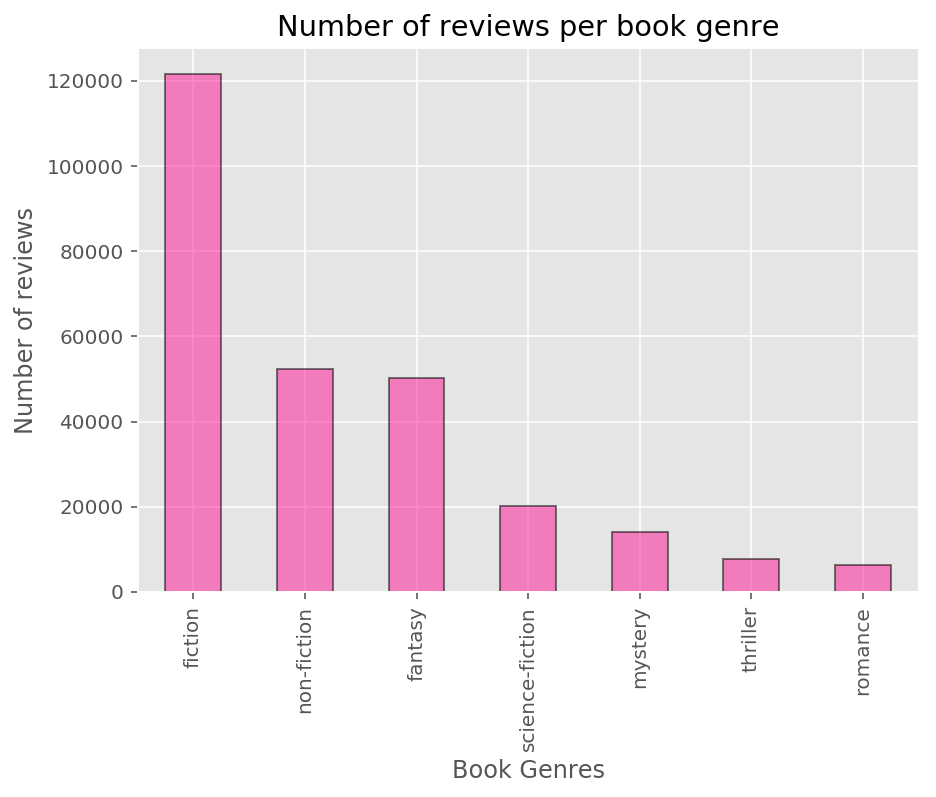

In [16]:
# plotting the number of reviews for each book genre 
ax = book_info_reviews_genres.book_genres.value_counts().plot(kind='bar', figsize=(7,5), edgecolor='black', lw=1, alpha = 0.5, color='deeppink')
ax.set_xlabel('Book Genres')
ax.set_ylabel('Number of reviews')
_ = ax.set_title('Number of reviews per book genre')

The majority of book reviews in this dataset are reviews of fiction books (general fiction, fantasy, science-fiction, mystery, thriller and romance), which means that non-fiction book reviews will be underrepresented in my topic model. This may have an impact on the performance of my LDA model.

#### Wordclouds

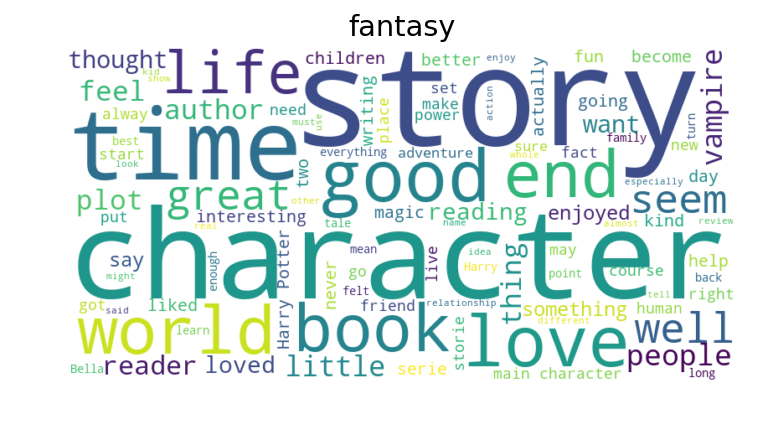

In [17]:
generate_wordcloud(df=book_info_reviews_genres, book_genre="fantasy")

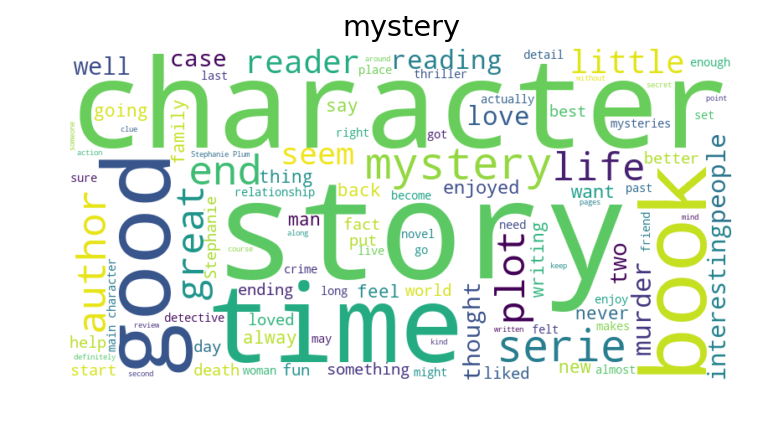

In [18]:
generate_wordcloud(df=book_info_reviews_genres, book_genre='mystery')

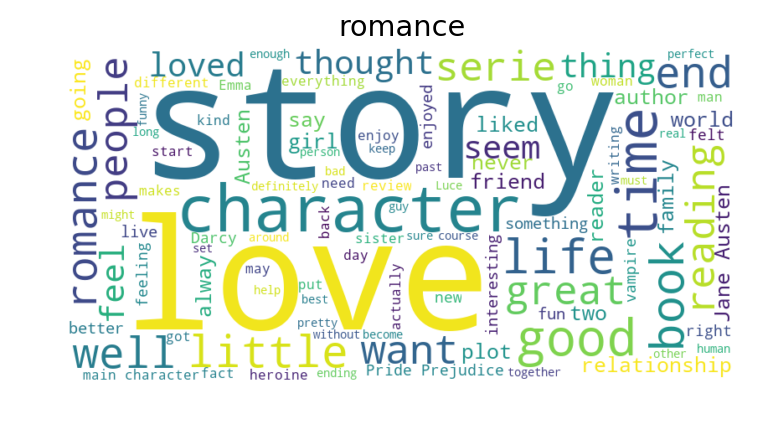

In [19]:
generate_wordcloud(df=book_info_reviews_genres, book_genre='romance')

The wordclouds show that even though some words are found across book reviews of different genres (e.g. "story", "character"), there are some differences. This is encouraging and I am curious to see if some of the topics my model will identify can be linked to book genres. Next, I will plot word counts on bar plots to get a more quantitative picture of how book review content changes with book genres.

#### Bar plots of word counts

In [20]:
fantasy_reviews = book_info_reviews_genres.reviews[book_info_reviews_genres.book_genres == 'fantasy']
fiction_reviews = book_info_reviews_genres.reviews[book_info_reviews_genres.book_genres == 'fiction']
nonfiction_reviews = book_info_reviews_genres.reviews[book_info_reviews_genres.book_genres == 'non-fiction']
scifi_reviews = book_info_reviews_genres.reviews[book_info_reviews_genres.book_genres == 'science-fiction']
mystery_reviews = book_info_reviews_genres.reviews[book_info_reviews_genres.book_genres == 'mystery']
thriller_reviews = book_info_reviews_genres.reviews[book_info_reviews_genres.book_genres == 'thriller']
romance_reviews = book_info_reviews_genres.reviews[book_info_reviews_genres.book_genres == 'romance']

##### Plot of the word counts for fantasy reviews

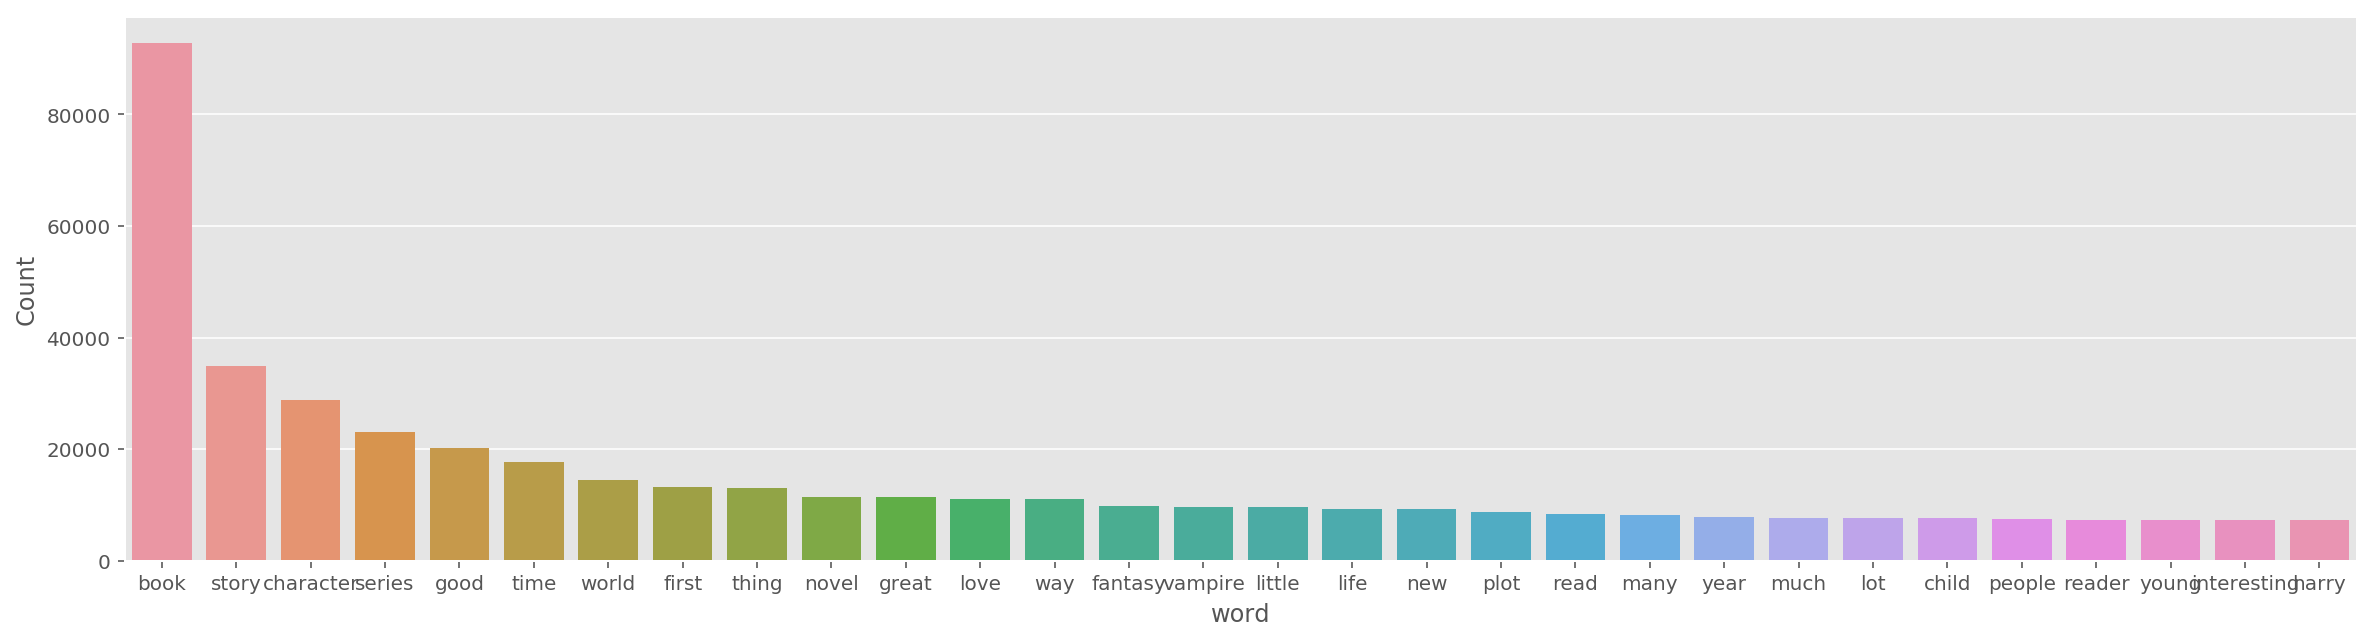

In [21]:
plot_word_frequency(fantasy_reviews)

##### Plot of the word counts for mystery reviews

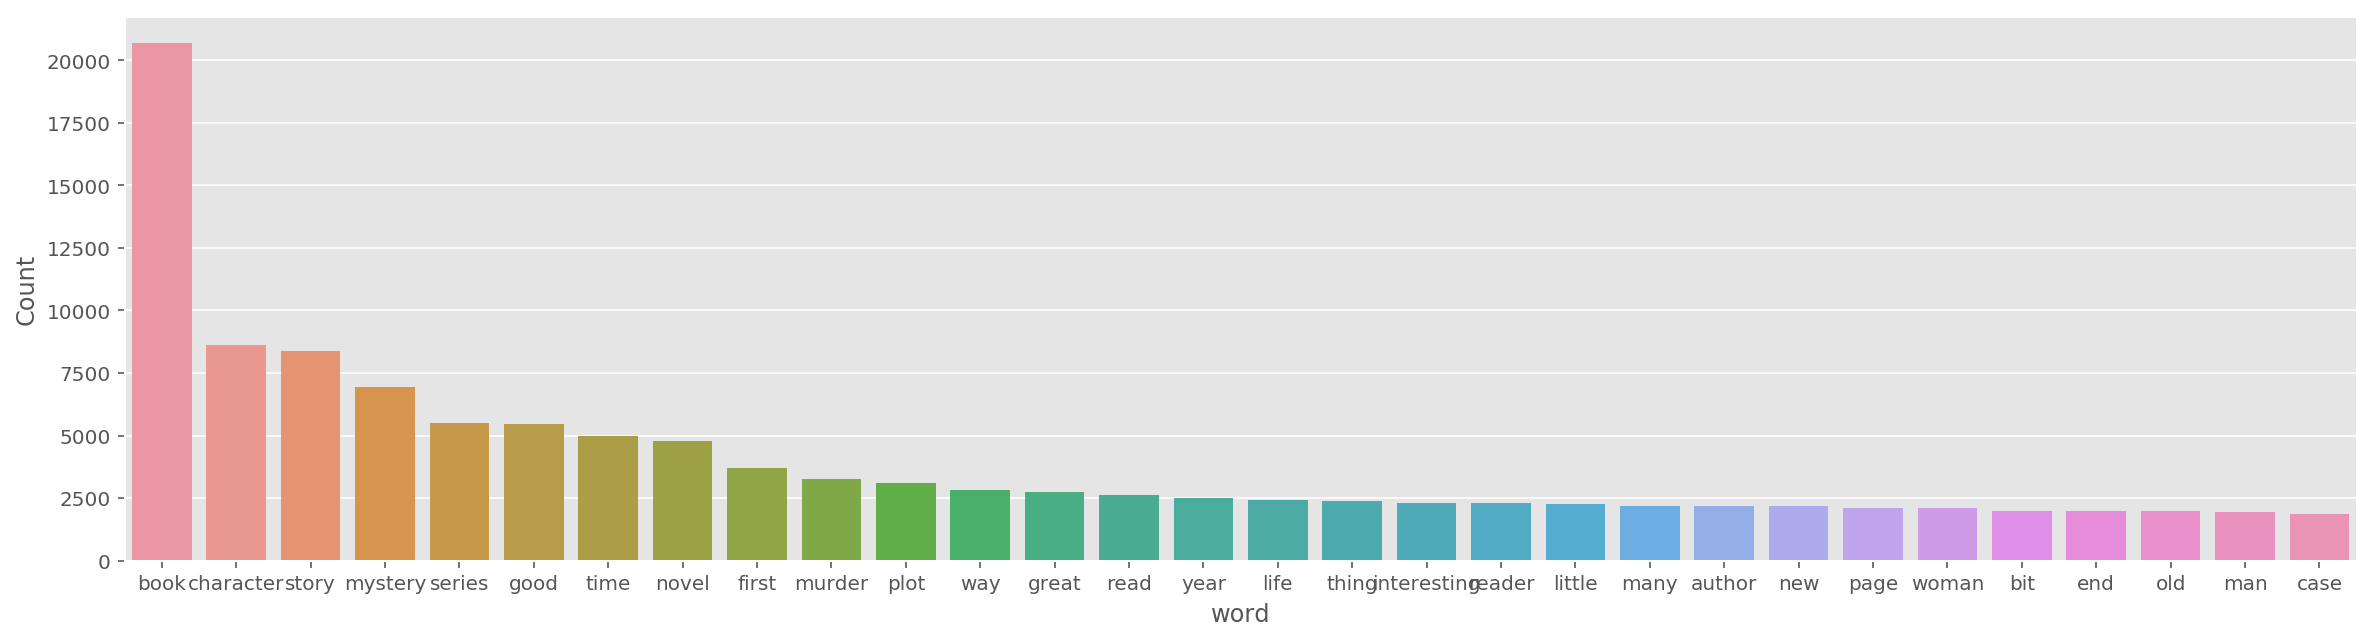

In [22]:
plot_word_frequency(mystery_reviews)

##### Plot of the word counts for romance reviews

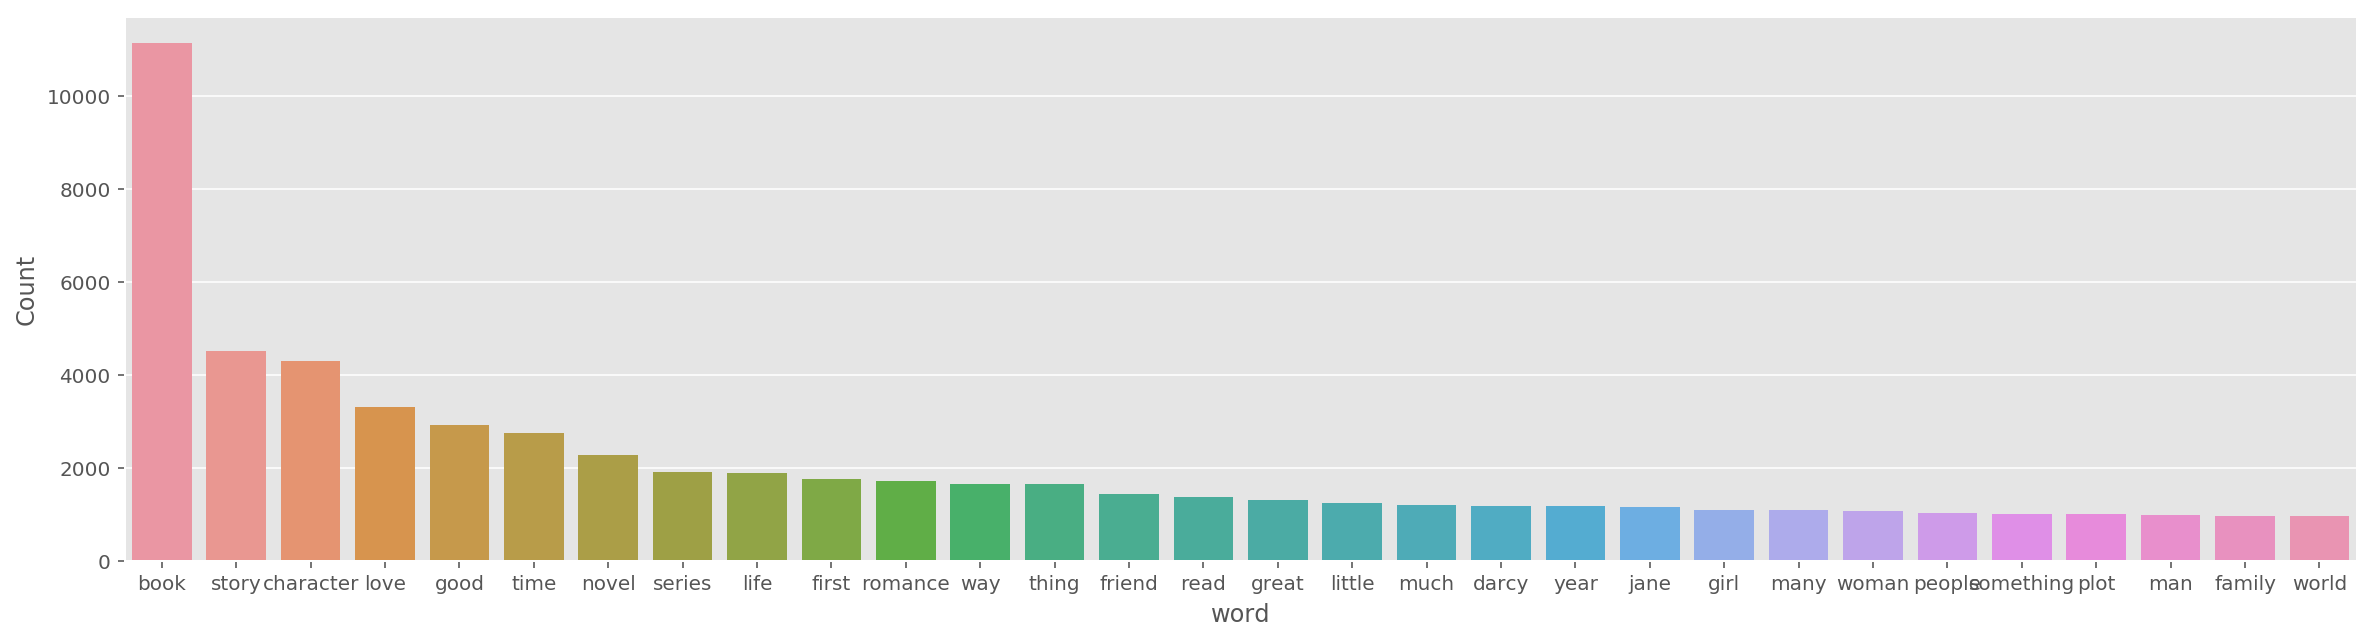

In [23]:
plot_word_frequency(romance_reviews)

As with the wordclouds, the bar plots reveal some common words across all genres, including "book", "story", "character", "time" and "good". They also show that some words are more common in some genres than others (e.g. "mystery" or "plot" for thriller and mystery books), which suggests that a topic model of all reviews may yield distinct topics for the different genres. After assessing these plots, and taking into account that some frequent words are shared across all genres, I think that having one topic model with all reviews would be more effective than having a topic model for each genre.